In [33]:
##ALL OF THE IMPORTS AND SUCH

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import math
from numpy import genfromtxt
import colorcet as cc
import random
import aotools

import numpy as np

plt.style.use('dark_background')


In [34]:
#Generate Colormap Intensity
cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap[:, 0]= np.linspace(0, 0, 256)
cmap[:, 1]= np.linspace(0, 0, 256)
cmap[:, 2]= np.linspace(0, 0, 256)
#Intensity colours
imap = matplotlib.colors.ListedColormap(cmap)
#Phase colours
pmap= cc.m_CET_C6

In [ ]:
#Generate Phase colormap
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap=pmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.1, 1.2, 2])
pl.colorbar(orientation="horizontal", cax=cax, ticks=[])
pl.savefig("colorbar.png")

In [36]:
##These are custom functions for plotting the LightPipes beams with Phase and Intensity on the same plot, alternatively just the Intensity or just the Phase.

def plotbeam(F):
    I=1-Intensity(0,F)
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I))
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

def plotint(F):
    I=Intensity(0,F)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(I,cmap='grey')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

def plotphase(F):
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')

    plt.tight_layout()

In [57]:
#This is a function for making OAM beams, 

def OAM(state: int=0 ,phase=0):
    
    F=Begin(size,wavelength,N)

    if(state==0):
        F=GaussBeam(F, w0)
    else:
        F=GaussBeam(F, w0, doughnut=True, n=0,m=state)

    return F

In [62]:
#These are some functions for making fancy beams, for now, lets not think about them but lets keep them.

# Generate mode list and mix many beams
def ell(d):
    if d%2 == 0:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d+1,dtype=int)
        l=l[l != 0]
    else:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d,dtype=int)
    return l

def MixManyBeams(beams):
    if len(beams) > 1:
        beams[1]=BeamMix(beams[0],beams[1])
        beams.pop(0)
        MixManyBeams(beams)
    return beams[0]

def ANG(d,state):
    Q,p=[],[]
    l=ell(d)
    
    for i in range(d):
        p.append((2*np.pi/d)*i*state)

    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)
    return(F)

#THIS IS BROKEN, DO NOT TRY
def ArbMUB(d,MUB,state):
    Q,p=[],[]
    l=ell(d)

    for k in range(d):
        first=state*(d-k)
        sk=sum(range(state, d))
        second=(-MUB*sk)
        p.append(np.exp((2j*np.pi/d)*(first+second)))
        
    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)
    return(p)
    

In [85]:
#Constants
pi=3.141592653

#Settings for the Beam

#Let us go with 785 nm for the wavelength
wavelength = 785*nm

# This is the size of the window we are generating, Our reciever is 30 cm diameter so I figured 30 cm is good
size = 30*cm

#This is the beam waist, I do not know if this is radius or if this is diameter, this would be good to check!
#I am suspecting it is radius for some reason?
w0=3*cm

#PropogationDistance
z=5400

#Resolution, keep low for doing rough work, but when we make nice plots we need to crank it up
N = 250

#This will be the average Fried parameter that we want to simulate
r0=0.1
#This will be the "Scintillation index" Sigma_Chi^2 in the textbook I sent over. I don't know what normal values for this are.
scint=0.5

In [ ]:
#### My understanding is that "Donut" is just the way that the Lightpipes refers to beams with OAM.
F=OAM(0)
plotint(F)
plotphase(F)

In [21]:
# This is an example of generating a single turbulence screen with the AOtools library.  I do not claim to fully understand what the last two inputs are,
# I am pretty sure I got those values from the internet though and they should be good.

phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001)

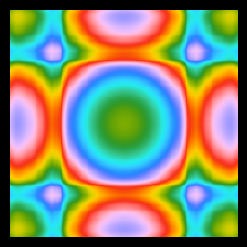

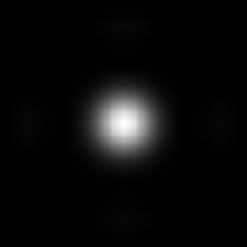

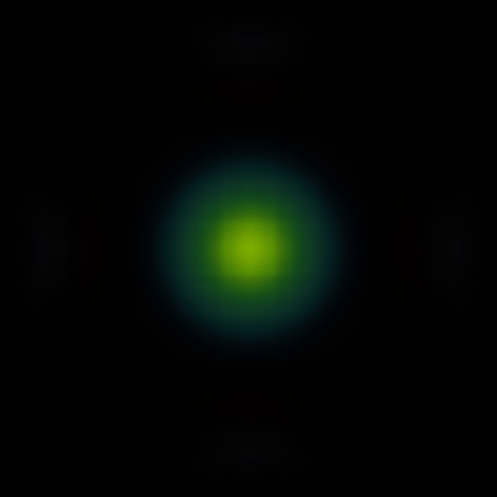

In [86]:
#I don't know if this one, or the next one is better. There is something interesting going on where the boundaries are
# reflective, so in propagation stuff looks funny
beam=OAM(0)
for i in range(10):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(10000,N,size/N,100,0.001)
    beam=SubPhase(beam,Phase(beam)+phase)
    beam=Fresnel(beam,500)
    plotphase(beam)
    plotint(beam)
plotbeam(beam)

In [ ]:
F=OAM(0)
for i in range(n):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,1*mm)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.mod(phase+np.min(phase),2*pi),cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    print(np.max(Intensity(F)))
    F=SubPhase(F,Phase(F)+phase)
    F=Fresnel(F,z/n)

    plotbeam(F)


